**Importing The ImageDataGenerator Library**

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Define the parameters/arguments for ImageDataGenerator class**

In [ ]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

**Applying ImageDataGenerator functionality to trainset**

In [ ]:
x_train = train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/DataSet/TrainSet",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )


Found 117 images belonging to 2 classes.


**Applying ImageDataGenerator functionality to testset**

In [ ]:
x_test = test.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/DataSet/TestSet",
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )


Found 117 images belonging to 2 classes.


In [ ]:
x_test.class_indices

{'Forest': 0, 'WithFire': 1}

**Import model building libraries**

In [ ]:
#to define linear initialisation import sequential
from keras.models import Sequential
#to add layer import Dense
from keras.layers import Dense
#to create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

**Initializing the model**

In [ ]:
model =Sequential()

**Add CNN Layer**

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

**Add Hidden Layer**

In [ ]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

**Configure the learning process**

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])


**Train the model**

In [ ]:
model.fit_generator(x_train,steps_per_epoch=4,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
4/4 [==============================] - 45s 14s/step - loss: 0.6712 - accuracy: 0.5812 - val_loss: 0.5854 - val_accuracy: 0.6667
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.5222 - accuracy: 0.8120 - val_loss: 0.3652 - val_accuracy: 0.8632
Epoch 3/10
4/4 [==============================] - 8s 2s/step - loss: 0.2751 - accuracy: 0.9402 - val_loss: 0.1587 - val_accuracy: 0.9402
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.2017 - accuracy: 0.9145 - val_loss: 0.1126 - val_accuracy: 0.9487
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 0.1114 - accuracy: 0.9487 - val_loss: 0.1194 - val_accuracy: 0.9402
Epoch 6/10
4/4 [==============================] - 8s 2s/step - loss: 0.0882 - accuracy: 0.9573 - val_loss: 0.2420 - val_accuracy: 0.9231
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.1641 - accuracy: 0.9573 - val_loss: 0.4705 - val_accuracy: 0.8291
Epoch 8/10
4/4 [=======================

**Save The Model**

In [ ]:
model.save("/content/drive/MyDrive/forest1.h5")

**Predictions**

In [ ]:
predictions = model.predict(x_test)
predictions = np.round(predictions)

4/4 [==============================] - 3s 668ms/step


In [ ]:
predictions

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

In [ ]:
print(len(predictions))

117


In [ ]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [ ]:
#load the saved model
model = load_model("/content/drive/MyDrive/forest1.h5")

In [ ]:

def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [ ]:
predictImage("/content/drive/MyDrive/Colab Notebooks/DataSet/TestSet/WithFire/With Fire (13).jpeg")

1/1 [==============================] - 0s 97ms/step
[[1.]]
 fire


**OpenCV For Video Processing**

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install playsound
!pip install pygobject
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#load the saved model
model = load_model(r'/content/drive/MyDrive/forest1.h5')
#define video
video = cv2.VideoCapture('/content/drive/MyDrive/forestfireF1.mp4')
#define the features
name = ['forest','with forest']

**Creating An Account In Twilio Service**

In [ ]:
account_sid='ACb2d4235f686873a722b463631f72f069'
auth_token='4420a201ee6d29c8bbf876084dd91405'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
      body='Forest Fire is detected, stay alert',
      from_='+1 7174938724',
      to='+91 98434 50890'
)
print(message.sid)

SMb9229d438ff8e20514445c7b53c7839a


**Sending Alert Message**

In [ ]:
def message(val):
  if val==1:
    from twilio.rest import Client
    print('Forest fire')
    account_sid='ACb2d4235f686873a722b463631f72f069'
    auth_token='4420a201ee6d29c8bbf876084dd91405'
    client=Client(account_sid,auth_token)
    message=client.messages \
     .create(
        body='forest fire is detected, stay alert',
        #use twilio free number
        from_='+1 7174938724',
        #to number
        to='+91 98434 50890')
    print(message.sid)
    print("Fire detected")
    print("SMS Sent!")
  elif val==0:
    print('No Fire')

1/1 [==============================] - 0s 29ms/step


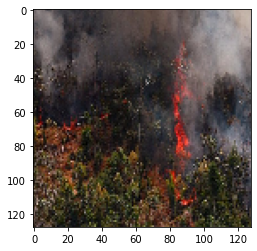

Forest fire
SMf4fd2627eecaaea7453b11d5313ac158
Fire detected
SMS Sent!


In [ ]:
from matplotlib import pyplot as plt
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/content/drive/MyDrive/Colab Notebooks/DataSet/TestSet/WithFire/With Fire (17).jpeg',target_size=(128,128))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
message(val)

1/1 [==============================] - 0s 29ms/step


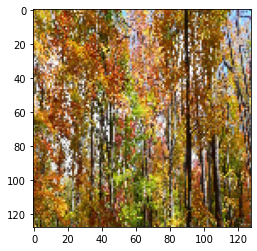

No Fire


In [ ]:
img2 = image.load_img('/content/drive/MyDrive/Colab Notebooks/DataSet/TestSet/Forest/Forest (14).jpeg',target_size=(128,128))
Y = image.img_to_array(img2)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img2)
plt.show()
message(val)

In [1]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 132 kB 57.0 MB/s 
     |████████████████████████████████| 79 kB 8.2 MB/s 
     |████████████████████████████████| 9.9 MB 43.4 MB/s 
     |████████████████████████████████| 140 kB 42.9 MB/s 
     |████████████████████████████████| 956 kB 10.3 MB/s 
     |████████████████████████████████| 135 kB 43.0 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=202b40df548a70ce9527386ee0656a282572498f20e68bbf2987a0f491590ad0
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=510b19d9fea

In [2]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.1 MB/s 
     |████████████████████████████████| 51 kB 264 kB/s 
     |████████████████████████████████| 824 kB 40.8 MB/s 
     |████████████████████████████████| 133 kB 42.6 MB/s 
     |████████████████████████████████| 547 kB 43.0 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=933ddb7c1f20c4a600aba74ee13228f4226ca93645ffa6bdb81d328aa2437887
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=9af00c8bd324b70e272441ac8c403ba5c47181c0d74e112a7eccc171d2cb748e
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [3]:
#Connecting to IBM Cloud from Notebook
from ibm_watson_machine_learning import APIClient
credentials = {
    'url':'https://eu-gb.ml.cloud.ibm.com',
    'apikey':"IPJl2muoiEQuiCN8SlAVWhibUleKXXfaBLhsV1BqG13F"
}
Client = APIClient(credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [4]:
Client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/942b74057f4f4693a5063e53a1998c0a:fd4c34ac-8fb8-4091-803e-702fd69e7268::',
      'guid': 'fd4c34ac-8fb8-4091-803e-702fd69e7268',
      'name': 'Watson Machine Learning-np',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'FFD_DEPLOYMENT',
    'scope': {'bss_account_id': '942b74057f4f4693a5063e53a1998c0a'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '40eacea5-8669-4880-9cfa-020f7b937fd4',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': '58823ca22e35459f9ed23e5b64c52395',
        'api_key': 'sVpdNRV_kFC_io-UFrygUfCvKG73HUFzg6klpZTdATir',
        'secret_access_key': '7a4d123516809989ff6335da34b75262f8d1b2720b1e3993',
        'service_id': 'ServiceId-487cda5f-c257-41ec-91b1-3676d0a722ec'},
       'editor': {'access_key_id': '11c6512f22854163bdaeeaad7c6e634f',
        'ap

In [5]:
Client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------  ------------------------
ID                                    NAME            CREATED
54f66e28-7d03-4808-8e64-b0c3b4826004  FFD_DEPLOYMENT  2022-11-11T20:38:20.212Z
------------------------------------  --------------  ------------------------


In [6]:
space_uid = '54f66e28-7d03-4808-8e64-b0c3b4826004' #Space User ID
space_uid

'54f66e28-7d03-4808-8e64-b0c3b4826004'

In [7]:
#Setting created deployment space as default
Client.set.default_space(space_uid)

'SUCCESS'

In [8]:
#Seeing tensorflow asset_id
Client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [9]:
software_space_uid = Client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
model_details = Client.repository.store_model(model="/content/drive/MyDrive/Colab Notebooks/DataSet",meta_props={
    Client.repository.ModelMetaNames.NAME:"CNN Model for Forest fire detection",
    Client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    Client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [13]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T08:49:03.157Z',
  'id': 'c30b39d7-37d6-459d-88bb-1812215574b7',
  'modified_at': '2022-11-19T08:49:09.912Z',
  'name': 'CNN Model for Forest fire detection',
  'owner': 'IBMid-66100457F5',
  'resource_key': 'a676ae34-ac5a-4991-b75a-768526bcf898',
  'space_id': '54f66e28-7d03-4808-8e64-b0c3b4826004'},
 'system': {'warnings': []}}

In [14]:
model_id = Client.repository.get_model_uid(model_details)
model_id

This method is deprecated, please use get_model_id()


/usr/local/lib/python3.7/dist-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


'c30b39d7-37d6-459d-88bb-1812215574b7'

In [15]:
#Downloading the model from IBM Cloud
Client.repository.download(model_id,'ffd_model.tgz')

Successfully saved model content to file: 'ffd_model.tgz'


'/content/ffd_model.tgz'